In [24]:
import pandas as pd
import numpy as np

In [25]:
# Load the CSV files into DataFrames
h_d = pd.read_csv(r"C:\Users\bhanu\Downloads\historical_data.csv")
s_d = pd.read_csv(r"C:\Users\bhanu\Downloads\fear_greed_index.csv")

In [26]:
#Check the Shape and Column Names
print("Historical Data Shape:", h_d.shape)
print("Sentiment Data Shape:", s_d.shape)

print("Historical Data Columns:", h_d.columns.tolist())
print("Sentiment Data Columns:", s_d.columns.tolist())

Historical Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)
Historical Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Data Columns: ['timestamp', 'value', 'classification', 'date']


In [27]:
#Check for Missing Values
print("Missing values in Historical Data:")
print(h_d.isnull().sum())

print("\nMissing values in Sentiment Data:")
print(s_d.isnull().sum())


Missing values in Historical Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [28]:
# Check Data Types
print("Historical Data Types:")
print(h_d.dtypes)

print("\nSentiment Data Types:")
print(s_d.dtypes)


Historical Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

Sentiment Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object


In [29]:
#View Sample Rows
print("Sample rows from Historical Data:")
print(h_d.head())

print("\nSample rows from Sentiment Data:")
print(s_d.head())


Sample rows from Historical Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     O

In [30]:
#Check For Duplicates
print("Duplicate rows in Historical Data:", h_d.duplicated().sum())
print("Duplicate rows in Sentiment Data:", s_d.duplicated().sum())


Duplicate rows in Historical Data: 0
Duplicate rows in Sentiment Data: 0


In [31]:
#Check Unique Values (Optional but Helpful)
print("Unique sentiments in classification column:")
print(s_d["classification"].unique())

print("\nUnique trading sides:")
print(h_d["Side"].unique())

Unique sentiments in classification column:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Unique trading sides:
['BUY' 'SELL']


In [32]:
######Clean and convert timestamps for merging#######

In [33]:
#Convert Date Columns to Datetime Format
# Convert timestamp columns to datetime
h_d["Timestamp IST"] = pd.to_datetime(h_d["Timestamp IST"], format="%d-%m-%Y %H:%M")
s_d["date"] = pd.to_datetime(s_d["date"])

In [34]:
#Extract Date from Timestamp (Drop Time)
h_d["date"] = h_d["Timestamp IST"].dt.date
s_d["date"] = s_d["date"].dt.date

In [35]:
#Merge Both Datasets on Date
merged_data = pd.merge(h_d, s_d, on="date", how="left")


In [36]:
#Check Merged Data
print("Merged Data Shape:", merged_data.shape)
print("Sample Merged Data:")
print(merged_data[["date", "Side", "Execution Price", "Closed PnL", "classification"]].head())


Merged Data Shape: (211224, 20)
Sample Merged Data:
         date Side  Execution Price  Closed PnL classification
0  2024-12-02  BUY           7.9769         0.0  Extreme Greed
1  2024-12-02  BUY           7.9800         0.0  Extreme Greed
2  2024-12-02  BUY           7.9855         0.0  Extreme Greed
3  2024-12-02  BUY           7.9874         0.0  Extreme Greed
4  2024-12-02  BUY           7.9894         0.0  Extreme Greed


In [37]:
merged_data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,1.745559e+09,60.0,Greed


In [38]:
#phase2
# Exploratory Data Analysis (EDA)
#step1 - Summary Stats by Sentiment
summary_by_sentiment = merged_data.groupby("classification")["Closed PnL"].describe()
print(summary_by_sentiment)

                  count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  


In [39]:
#step2-Total and Average PnL by Sentiment(Total and Average Profit by Sentiment)

pnl_by_sentiment = merged_data.groupby("classification")["Closed PnL"].agg(["sum", "mean", "count"]).sort_values(by="mean", ascending=False)
print(pnl_by_sentiment)


                         sum       mean  count
classification                                
Extreme Greed   2.715171e+06  67.892861  39992
Fear            3.357155e+06  54.290400  61837
Greed           2.150129e+06  42.743559  50303
Extreme Fear    7.391102e+05  34.537862  21400
Neutral         1.292921e+06  34.307718  37686


In [40]:
#step3 - PnL by Side and Sentiment (BUY vs SELL) (Performance of BUY vs SELL in Each Sentiment)
side_sentiment_pnl = merged_data.groupby(["classification", "Side"])["Closed PnL"].mean().unstack()
print(side_sentiment_pnl)


Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


In [41]:
#Step4-Count of Trades by Sentiment (Optional)
trade_counts = merged_data["classification"].value_counts()
print(trade_counts)

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


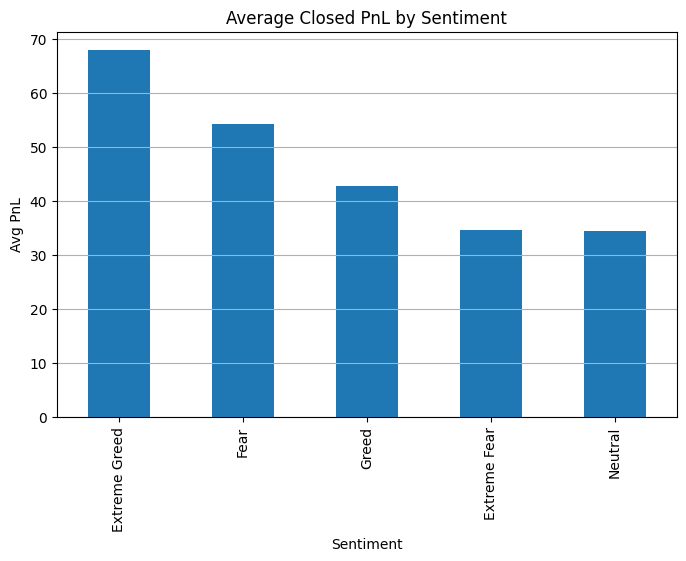

In [42]:
# step5 - Visualize Profit by Sentiment (Optional Visualization)-Visualize Average Profit by Sentiment
import matplotlib.pyplot as plt

pnl_by_sentiment["mean"].plot(kind="bar", title="Average Closed PnL by Sentiment", ylabel="Avg PnL", xlabel="Sentiment", figsize=(8,5))
plt.grid(axis='y')
plt.show()


In [43]:
#PHASE 3: Pattern Analysis & Insights
# Correlation Between Sentiment Score and PnL

merged_data["value"] = pd.to_numeric(merged_data["value"], errors="coerce")
merged_data[["value", "Closed PnL"]].corr()

,value,Closed PnL
value,1.000000,0.008121
Closed PnL,0.008121,1.000000


In [44]:
# High vs Low Sentiment Bins
def bin_sentiment(row):
    if row['classification'] in ['Extreme Fear', 'Fear']:
        return 'Low'
    elif row['classification'] == 'Neutral':
        return 'Mid'
    else:
        return 'High'

merged_data["Sentiment_Level"] = merged_data.apply(bin_sentiment, axis=1)

In [45]:
merged_data.groupby("Sentiment_Level")["Closed PnL"].mean()

Sentiment_Level
High    54.349039
Low     49.212077
Mid     34.307718
Name: Closed PnL, dtype: float64

#Implementation of Trading Strategies
Important Notes:

Trend Calculation: For the trend-following strategy, you'll need to implement your own logic to calculate the Trend column using technical indicators.
Backtesting: Remember to thoroughly backtest these strategies with historical data before using them in live trading.
Customization: Adapt the code and logic to your specific trading preferences and risk tolerance.
Risk Management: Always incorporate appropriate risk management measures, such as stop-loss orders and position sizing limits.

1. Contrarian Strategy:
Concept: Buy when the market is extremely fearful ("buy the dip") and sell when it's extremely greedy ("sell the peak").
Logic: Uses the "Fear & Greed Index" to identify extreme sentiment levels.
Goal: Profit from market reversals.

2. Trend-Following Strategy with Sentiment Confirmation:
Concept: Trade in the direction of the prevailing trend (uptrend or downtrend) but only when sentiment confirms the trend (e.g., buy in an uptrend during periods of greed or neutral sentiment).
Logic: Combines technical indicators (for trend) with sentiment analysis.
Goal: Enhance trend-following with sentiment as a filter to improve timing.

3. Sentiment-Weighted Position Sizing:
Concept: Adjust the size of your trades based on market sentiment. For example, take larger positions during periods of greed and smaller positions during periods of fear.
Logic: Uses sentiment to dynamically manage risk and potentially increase returns.
Goal: Optimize position size for better risk-reward.

4. Sentiment-Based Market Timing:
Concept: Enter or exit the market based on shifts in overall market sentiment. For example, buy when sentiment turns positive and sell when it turns negative.
Logic: Tracks sentiment trends using rolling averages or other techniques.
Goal: Time market entry and exit to capitalize on broad sentiment changes.

In [46]:

#1. Contrarian Strategy:

# Define a function to generate trading signals
def contrarian_signal(row):
    if row['classification'] == 'Extreme Fear':
        return 'Buy'  # Enter long position
    elif row['classification'] == 'Extreme Greed':
        return 'Sell' # Enter short position
    else:
        return 'Hold'  # No action

# Apply the function to the DataFrame to create a new signal column
merged_data['Contrarian_Signal'] = merged_data.apply(contrarian_signal, axis=1)

# Using the 'Contrarian_Signal' column to trigger trades

In [47]:
#2. Trend-Following Strategy with Sentiment Confirmation:

# Calculate a simple moving average (SMA) to determine the trend
merged_data['SMA_20'] = merged_data['Execution Price'].rolling(window=20).mean()  # 20-day SMA

# Define a function to determine the trend based on the SMA
def determine_trend(row):
    if row['Execution Price'] > row['SMA_20']:
        return 'Up'
    elif row['Execution Price'] < row['SMA_20']:
        return 'Down'
    else:
        return 'Neutral'  # Or 'Hold' if you prefer

# Apply the function to create the 'Trend' column
merged_data['Trend'] = merged_data.apply(determine_trend, axis=1)

In [48]:
# 'Trend' column indicating market trend (e.g., 'Up', 'Down')
# (You'll need to calculate this using technical indicators)

def trend_sentiment_signal(row):
    if row['Trend'] == 'Up' and row['classification'] in ['Greed', 'Neutral']:
        return 'Buy'
    elif row['Trend'] == 'Down' and row['classification'] in ['Fear', 'Neutral']:
        return 'Sell'
    else:
        return 'Hold'

merged_data['Trend_Sentiment_Signal'] = merged_data.apply(trend_sentiment_signal, axis=1)

In [49]:
#3. Sentiment-Weighted Position Sizing:
# Define a function to calculate position size based on sentiment
def sentiment_position_size(row):
    if row['classification'] == 'Greed':
        return 1.2  # Increase position size by 20%
    elif row['classification'] == 'Fear':
        return 0.8  # Decrease position size by 20%
    else:
        return 1.0  # Normal position size

# Apply the function to calculate position sizes for each trade
merged_data['Position_Size'] = merged_data.apply(sentiment_position_size, axis=1)

# Adjust your trade orders based on the 'Position_Size' column


In [51]:
#4. Sentiment-Based Market Timing:
# Track sentiment shifts using rolling averages or other techniques
# (This will require additional calculations based on your sentiment data)

# Example: Using a rolling average of sentiment scores
merged_data['Sentiment_Rolling_Avg'] = merged_data['value'].rolling(window=10).mean()

# Generate signals based on sentiment shifts

merged_data['Market_Timing_Signal'] = np.where(
    (merged_data['Sentiment_Rolling_Avg'] > 0) & (merged_data['Sentiment_Rolling_Avg'].shift(1) < 0),
    'Buy',  # Enter long when sentiment turns positive
    np.where(
        (merged_data['Sentiment_Rolling_Avg'] < 0) & (merged_data['Sentiment_Rolling_Avg'].shift(1) > 0),
        'Sell',  # Enter short when sentiment turns negative
        'Hold'
    )
)

#Important Notes:

Trend Calculation: For the trend-following strategy, you'll need to implement your own logic to calculate the Trend column using technical indicators.
Backtesting: Remember to thoroughly backtest these strategies with historical data before using them in live trading.
Customization: Adapt the code and logic to your specific trading preferences and risk tolerance.
Risk Management: Always incorporate appropriate risk management measures, such as stop-loss orders and position sizing limits.

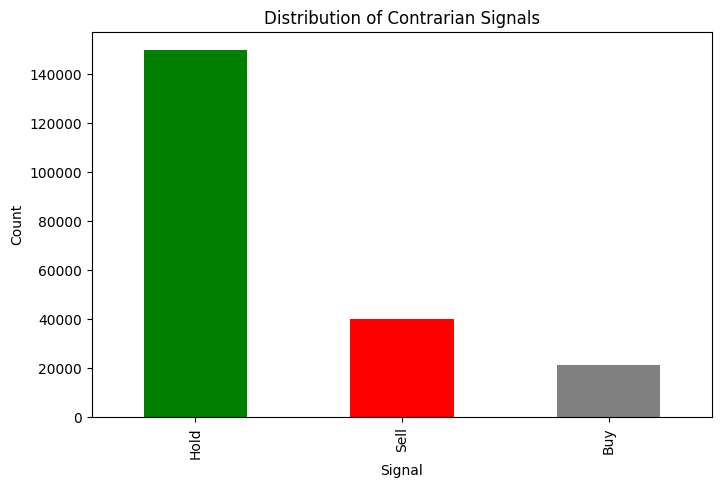

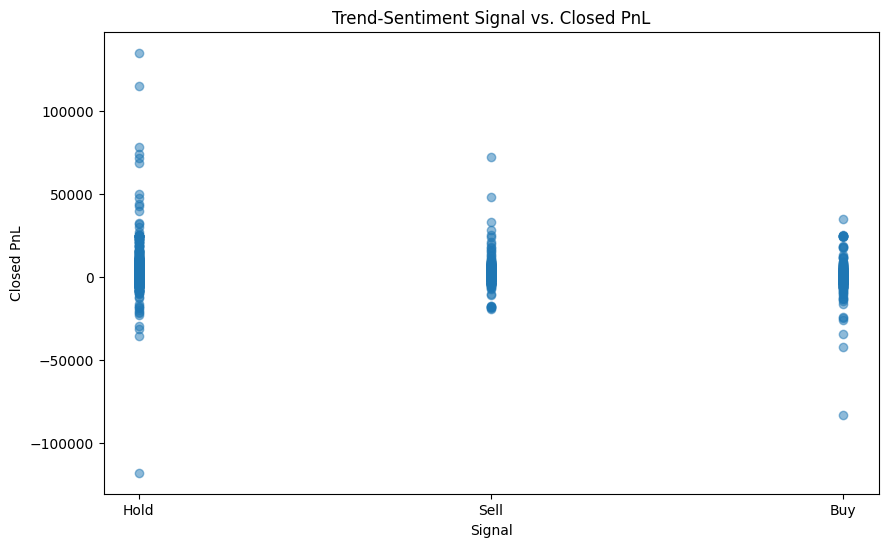

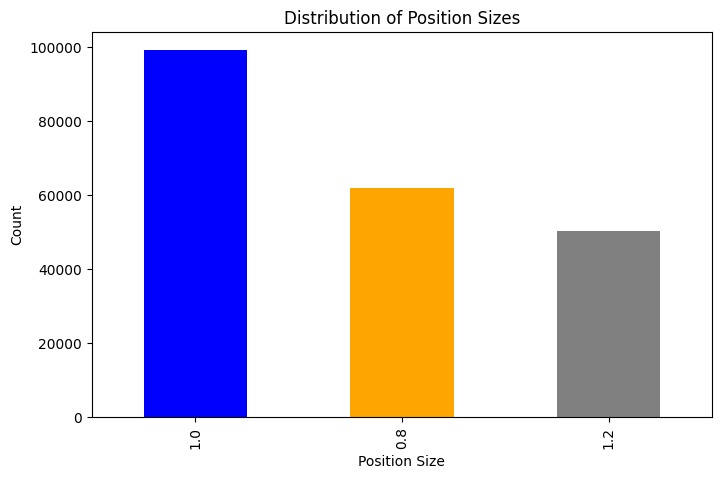

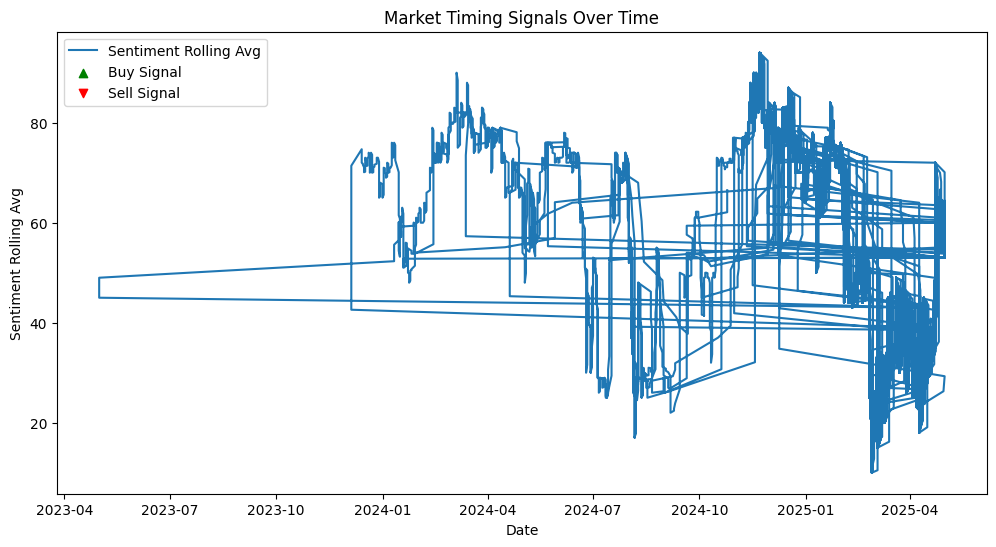

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Contrarian Strategy
def contrarian_signal(row):
    if row['classification'] == 'Extreme Fear':
        return 'Buy'
    elif row['classification'] == 'Extreme Greed':
        return 'Sell'
    else:
        return 'Hold'

merged_data['Contrarian_Signal'] = merged_data.apply(contrarian_signal, axis=1)

# Visualization: Distribution of Contrarian Signals
plt.figure(figsize=(8, 5))
merged_data['Contrarian_Signal'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribution of Contrarian Signals')
plt.xlabel('Signal')
plt.ylabel('Count')
plt.show()

# 2. Trend-Following Strategy with Sentiment Confirmation
# 'Trend' column calculated using technical indicators

def trend_sentiment_signal(row):
    if row['Trend'] == 'Up' and row['classification'] in ['Greed', 'Neutral']:
        return 'Buy'
    elif row['Trend'] == 'Down' and row['classification'] in ['Fear', 'Neutral']:
        return 'Sell'
    else:
        return 'Hold'

merged_data['Trend_Sentiment_Signal'] = merged_data.apply(trend_sentiment_signal, axis=1)

# Visualization: Trend-Sentiment Signal vs. Closed PnL
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Trend_Sentiment_Signal'], merged_data['Closed PnL'], alpha=0.5)
plt.title('Trend-Sentiment Signal vs. Closed PnL')
plt.xlabel('Signal')
plt.ylabel('Closed PnL')
plt.show()

# 3. Sentiment-Weighted Position Sizing
def sentiment_position_size(row):
    if row['classification'] == 'Greed':
        return 1.2
    elif row['classification'] == 'Fear':
        return 0.8
    else:
        return 1.0

merged_data['Position_Size'] = merged_data.apply(sentiment_position_size, axis=1)

# Visualization: Position Size Distribution
plt.figure(figsize=(8, 5))
merged_data['Position_Size'].value_counts().plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Distribution of Position Sizes')
plt.xlabel('Position Size')
plt.ylabel('Count')
plt.show()

# 4. Sentiment-Based Market Timing
merged_data['Sentiment_Rolling_Avg'] = merged_data['value'].rolling(window=10).mean()

merged_data['Market_Timing_Signal'] = np.where(
    (merged_data['Sentiment_Rolling_Avg'] > 0) & (merged_data['Sentiment_Rolling_Avg'].shift(1) < 0),
    'Buy',
    np.where(
        (merged_data['Sentiment_Rolling_Avg'] < 0) & (merged_data['Sentiment_Rolling_Avg'].shift(1) > 0),
        'Sell',
        'Hold'
    )
)

# Visualization: Market Timing Signals Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['Sentiment_Rolling_Avg'], label='Sentiment Rolling Avg')
plt.scatter(merged_data[merged_data['Market_Timing_Signal'] == 'Buy']['date'],
            merged_data[merged_data['Market_Timing_Signal'] == 'Buy']['Sentiment_Rolling_Avg'],
            marker='^', color='green', label='Buy Signal')
plt.scatter(merged_data[merged_data['Market_Timing_Signal'] == 'Sell']['date'],
            merged_data[merged_data['Market_Timing_Signal'] == 'Sell']['Sentiment_Rolling_Avg'],
            marker='v', color='red', label='Sell Signal')
plt.title('Market Timing Signals Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Rolling Avg')
plt.legend()
plt.show()